## Start with importing consolidated data

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


movies = pd.read_csv('./total_df.csv')

In [2]:
movies.isnull().sum()

title                0
Unnamed: 0         166
budget             166
genres             166
revenue            166
runtime            168
script             176
actor_1            180
actor_2            181
actor_3            181
director           177
rating             192
stars_out_of_10    179
writer             177
year               178
dtype: int64

In [3]:
#dropped all Nan values
movies.dropna(inplace = True) 

In [122]:
movies.shape

(1009, 17)

In [123]:
movies.head()

,title,Unnamed: 0,budget,genres,revenue,runtime,script,actor_1,actor_2,actor_3,director,rating,stars_out_of_10,writer,year,critical_success,financial_success
1,10 things i hate about you,0.0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",53478166.0,97.0,\r\r\n\r\r\n\r\r\n\r\r\n<b><!--\r\r\n</b>if (w...,Heath Ledger,Julia Stiles,Joseph Gordon-Levitt,Gil Junger,PG-13\r\r\n | \r\r\n,7.3,Karen McCullah,1999.0,1,1
3,12 and holding,2.0,400000.0,"[{'id': 18, 'name': 'Drama'}]",95687.0,90.0,\r\r\n \r\r\n \r\r\n ...,Conor Donovan,Jesse Camacho,Zoe Weizenbaum,Michael Cuesta,,7.6,Anthony Cipriano,2005.0,1,0
6,12 years a slave,4.0,20000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",187000000.0,134.0,\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n ...,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Steve McQueen,R\r\r\n | \r\r\n,8.1,John Ridley,2013.0,1,1
7,127 hours,5.0,18000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",35692920.0,94.0,\r\r\n\r\r\r\n\r\r\r\n \r\r\r\n ...,James Franco,Amber Tamblyn,Kate Mara,Danny Boyle,R\r\r\n | \r\r\n,7.6,Danny Boyle,2010.0,1,0
8,1492: conquest of paradise,6.0,47000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",7191399.0,154.0,\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n1492: Conquest o...,Gérard Depardieu,Armand Assante,Sigourney Weaver,Ridley Scott,PG-13\r\r\n | \r\r\n ...,6.5,Rose Bosch,1992.0,0,0


In [6]:
(movies['stars_out_of_10'] > movies['stars_out_of_10'].mean()).value_counts()

True     545
False    464
Name: stars_out_of_10, dtype: int64

In [7]:
def critical(row):
    if row['stars_out_of_10'] > movies['stars_out_of_10'].mean():
        value = 1
    else: 
        value = 0 
    return value

In [8]:
movies['critical_success'] = movies.apply(critical, axis = 1, inplace = True)

In [9]:
movies['critical_success'].value_counts()

1    545
0    464
Name: critical_success, dtype: int64

In [10]:
def success(row):
    if (row['revenue'] - row['budget']) > 20000000:
        value = 1
    else: 
        value = 0 
    return value

In [11]:
movies['financial_success'] = movies.apply(success, axis = 1)

In [12]:
((movies['revenue'] - movies['budget']) > 20000000).value_counts()

True     541
False    468
dtype: int64

In [13]:
movies.head(50)

,title,Unnamed: 0,budget,genres,revenue,runtime,script,actor_1,actor_2,actor_3,director,rating,stars_out_of_10,writer,year,critical_success,financial_success
1,10 things i hate about you,0.0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",53478166.0,97.0,\r\r\n\r\r\n\r\r\n\r\r\n<b><!--\r\r\n</b>if (w...,Heath Ledger,Julia Stiles,Joseph Gordon-Levitt,Gil Junger,PG-13\r\r\n | \r\r\n,7.3,Karen McCullah,1999.0,1,1
3,12 and holding,2.0,400000.0,"[{'id': 18, 'name': 'Drama'}]",95687.0,90.0,\r\r\n \r\r\n \r\r\n ...,Conor Donovan,Jesse Camacho,Zoe Weizenbaum,Michael Cuesta,,7.6,Anthony Cipriano,2005.0,1,0
6,12 years a slave,4.0,20000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",187000000.0,134.0,\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n ...,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Steve McQueen,R\r\r\n | \r\r\n,8.1,John Ridley,2013.0,1,1
7,127 hours,5.0,18000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",35692920.0,94.0,\r\r\n\r\r\r\n\r\r\r\n \r\r\r\n ...,James Franco,Amber Tamblyn,Kate Mara,Danny Boyle,R\r\r\n | \r\r\n,7.6,Danny Boyle,2010.0,1,0
8,1492: conquest of paradise,6.0,47000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",7191399.0,154.0,\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n1492: Conquest o...,Gérard Depardieu,Armand Assante,Sigourney Weaver,Ridley Scott,PG-13\r\r\n | \r\r\n ...,6.5,Rose Bosch,1992.0,0,0
9,15 minutes,7.0,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",56359980.0,120.0,\r\r\n\r\r\n\r\r\n\r\r\n<b><!--\r\r\n</b>if (w...,Robert De Niro,Edward Burns,Kelsey Grammer,John Herzfeld,R\r\r\n | \r\r\n,6.1,John Herzfeld,2001.0,0,0
10,17 again,8.0,20000000.0,"[{'id': 35, 'name': 'Comedy'}]",136267476.0,102.0,\r\r\n\r\r\n \r\r\n \r\r\n ...,Zac Efron,Matthew Perry,Leslie Mann,Burr Steers,PG-13\r\r\n | \r\r\n,6.4,Jason Filardi,2009.0,0,1
12,2001: a space odyssey,10.0,10500000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",68700000.0,149.0,\r\r\n\r\r\n\r\r\n\r\r\n\r\r\n2001: A Space Od...,Keir Dullea,Gary Lockwood,William Sylvester,Stanley Kubrick,G\r\r\n |,8.3,Stanley Kubrick,1968.0,1,1
13,2012,11.0,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",769653595.0,158.0,\r\r\n \r\r\n \r\r\n ...,John Cusack,Thandie Newton,Chiwetel Ejiofor,Roland Emmerich,PG-13\r\r\n | \r\r\n ...,5.8,Roland Emmerich,2009.0,0,1
14,25th hour,12.0,15000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",13060843.0,135.0,\r\r\r\n\r\r\r\nTHE 25th HOUR\r\r\n\r\r\n\r\r\...,Edward Norton,Barry Pepper,Philip Seymour Hoffman,Spike Lee,,7.7,David Benioff,2002.0,1,0


In [14]:
(movies['critical_success'] + movies['financial_success']).value_counts()

1    392
2    347
0    270
dtype: int64

In [124]:
movies.to_csv('movies.csv', index = True)

# Count Vectorizer - Script Data

In [110]:
corpus2 = movies['script']
cvec = CountVectorizer(stop_words='english', ngram_range=(1,4), min_df = 0.1, max_df = 0.9)

cvec.fit(corpus2)
all_scripts_corpus = cvec.transform(corpus2)
all_scripts_corpus

<1009x8859 sparse matrix of type '<class 'numpy.int64'>'
	with 2365226 stored elements in Compressed Sparse Row format>

In [111]:
all_scripts_corpus.todense()

matrix([[0, 0, 1, ..., 0, 0, 1],
        [0, 0, 3, ..., 0, 1, 0],
        [1, 0, 6, ..., 0, 0, 0],
        ...,
        [0, 0, 3, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [112]:
all_scripts_corpus.shape

(1009, 8859)

In [113]:
cvecscript  = pd.DataFrame(all_scripts_corpus.todense(),
                   columns=cvec.get_feature_names(), index = movies['title'])
cvecscript.head(), cvecscript.shape

(                            00  000  10  10 int  100  100 int  101  101 int  \
 title                                                                         
 10 things i hate about you   0    0   1       0    0        0    0        0   
 12 and holding               0    0   3       0    1        0    0        0   
 12 years a slave             1    0   6       0    7        0    3        1   
 127 hours                    4    2   7       0    1        0    0        0   
 1492: conquest of paradise   0    0   0       0    0        0    0        0   
 
                             102  102 int  ...    youngest  youth  yup  zero  \
 title                                     ...                                 
 10 things i hate about you    0        0  ...           0      0    0     0   
 12 and holding                0        0  ...           0      0    0     0   
 12 years a slave              3        0  ...           0      0    0     0   
 127 hours                     0      

In [114]:
for c in cvecscript.columns:
    try:
        float(c)
        cvecscript.drop(c, inplace = True, axis = 1)
    except:
        pass

In [115]:
cvecscript

,10 int,100 int,101 int,102 int,103 int,104 int,105 int,106 int,107 int,108 int,...,youngest,youth,yup,zero,zip,zips,zone,zoo,zoom,zooms
title,,,,,,,,,,,,,,,,,,,,,
10 things i hate about you,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12 and holding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12 years a slave,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
127 hours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
1492: conquest of paradise,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15 minutes,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4
17 again,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2001: a space odyssey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,1,0,0,0,0,0,0,0,1,0,...,0,0,0,2,1,1,2,0,1,0


### Test Train Split CountVectorizer

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#testing for viewer rating: number of stars out of ten
X_train, X_test, y_train, y_test = train_test_split(cvecscript.values, movies['stars_out_of_10'])

lr = LinearRegression()




In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((756, 8676), (253, 8676), (756,), (253,))

In [72]:
X_train

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

### Linear Regression CountVectorizer

In [25]:
lr.fit(X_train, y_train)
lr.predict(X_test)

array([ 1.49202686e+01,  3.73258623e+00,  4.96095101e+01,  2.82597451e+01,
        9.66633286e+00, -1.02135549e+01,  2.48574533e+01,  2.12631998e+00,
        2.92715605e+01, -1.14326073e+02, -1.58696416e+01,  1.37371673e+02,
        4.80537891e+01, -9.59379659e+00, -4.79667884e+00, -5.00372260e+01,
        4.87523228e+00,  2.23079058e+01,  9.18358630e-01,  1.07077668e+01,
        5.41705910e+00, -1.60414445e+01, -3.00932211e+00, -1.18274943e+01,
       -4.85840636e+00, -1.79613307e+01, -2.29496548e+01,  1.51076930e+01,
        2.19164401e+01, -5.05392002e+01,  7.90536828e+00,  1.42244048e+01,
       -2.98438662e+01,  1.27514606e+01, -2.33070161e+01,  6.52015040e+00,
        1.36005257e+01,  3.73010175e+01,  6.31215375e+00, -3.05767482e+00,
        3.62029540e+01,  2.62267615e+01,  2.28665603e+01,  4.97596362e+00,
       -2.24252213e+00,  2.44277464e+00, -5.42146415e+01, -4.97295772e+01,
        3.10377357e+01,  1.98654251e+01, -5.29285969e+01, -2.87434910e+00,
        2.71174325e+01,  

In [26]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(1.0, -1993.3568218650119)

### Random Forest CountVectorizer

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


C:\Users\Jeff Wilburn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [28]:
rf.fit(X_train, y_train)
rf.predict(X_test)

array([6.9 , 6.48, 6.69, 7.01, 7.27, 6.54, 7.16, 6.99, 6.33, 6.05, 6.74,
       6.57, 6.28, 7.1 , 6.63, 7.32, 6.03, 7.26, 7.4 , 6.39, 6.6 , 7.01,
       6.88, 7.41, 6.72, 7.45, 7.11, 6.83, 6.84, 6.26, 6.17, 6.85, 7.03,
       7.04, 6.95, 6.2 , 6.79, 6.77, 6.42, 7.18, 6.15, 6.52, 6.78, 7.26,
       6.39, 7.47, 6.97, 7.46, 6.74, 7.37, 7.06, 6.85, 6.85, 6.79, 7.16,
       7.18, 6.94, 7.17, 6.9 , 6.88, 6.87, 7.  , 6.65, 6.05, 7.  , 7.1 ,
       7.24, 6.84, 6.82, 7.01, 7.11, 6.84, 7.25, 6.88, 7.17, 6.71, 6.96,
       7.06, 6.72, 7.35, 6.95, 6.94, 6.16, 6.79, 7.02, 7.48, 6.89, 6.71,
       7.  , 6.5 , 7.3 , 6.9 , 6.68, 7.09, 7.17, 7.09, 6.8 , 5.64, 7.21,
       6.31, 7.18, 7.32, 7.55, 6.75, 6.94, 6.73, 7.31, 6.62, 6.43, 6.87,
       6.73, 6.73, 6.5 , 6.39, 6.82, 7.31, 7.06, 6.84, 6.81, 6.87, 6.66,
       7.01, 6.83, 7.28, 7.35, 7.22, 6.59, 7.34, 7.18, 7.21, 6.82, 7.25,
       6.95, 6.72, 6.93, 6.94, 7.  , 6.68, 6.44, 6.73, 7.03, 6.77, 7.3 ,
       7.07, 7.09, 6.52, 6.76, 6.56, 6.79, 6.8 , 6.

In [29]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8307676845792167, 0.015298677293901441)

In [30]:
#tweak min %, ngrams

#word cloud
#graph

#Lasso, Ridge
#dummy out the variables: actors, directors, writers, etc 

# TF-IDF the Script Data

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words='english', ngram_range = (1,3), min_df = 0.1, max_df = 0.9)

In [45]:
corpus2 = movies['script']

tvec.fit(corpus2)
all_scripts_corpus2 = tvec.transform(corpus2)
all_scripts_corpus2

<1009x8852 sparse matrix of type '<class 'numpy.float64'>'
	with 2364015 stored elements in Compressed Sparse Row format>

In [46]:
all_scripts_corpus2.todense()

matrix([[0.        , 0.        , 0.00228318, ..., 0.        , 0.        ,
         0.00453044],
        [0.        , 0.        , 0.00619963, ..., 0.        , 0.00419358,
         0.        ],
        [0.00298525, 0.        , 0.00928996, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.00494525, ..., 0.        , 0.        ,
         0.0032709 ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00192432, 0.00110631, ..., 0.        , 0.        ,
         0.        ]])

In [47]:
all_scripts_corpus2.shape

(1009, 8852)

In [48]:
tvecscript  = pd.DataFrame(all_scripts_corpus2.todense(),
                   columns=tvec.get_feature_names(), index = movies['title'])
tvecscript

,00,000,10,10 int,100,100 int,101,101 int,102,102 int,...,youngest,youth,yup,zero,zip,zips,zone,zoo,zoom,zooms
title,,,,,,,,,,,,,,,,,,,,,
10 things i hate about you,0.000000,0.000000,0.002283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004530
12 and holding,0.000000,0.000000,0.006200,0.000000,0.002418,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004194,0.000000
12 years a slave,0.002985,0.000000,0.009290,0.000000,0.012682,0.000000,0.006295,0.003722,0.006394,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
127 hours,0.013228,0.005967,0.012007,0.000000,0.002007,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.007671,0.000000,0.000000,0.000000,0.000000,0.003403
1492: conquest of paradise,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15 minutes,0.011477,0.000000,0.002976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006040,0.023624
17 again,0.000000,0.000000,0.003985,0.000000,0.002332,0.000000,0.000900,0.000000,0.000000,0.000000,...,0.000000,0.001377,0.000000,0.000000,0.001485,0.000000,0.000000,0.000000,0.000000,0.000000
2001: a space odyssey,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012,0.000000,0.006495,0.003734,0.002106,0.001092,0.000000,0.001265,0.000000,0.001285,0.000000,...,0.000000,0.000000,0.000000,0.003525,0.002087,0.001912,0.003612,0.000000,0.001894,0.000000


In [49]:
for c in tvecscript.columns:
    try:
        float(c)
        tvecscript.drop(c, inplace = True, axis = 1)
    except:
        pass

In [50]:
tvecscript.shape

(1009, 8676)

### Train Test Split TF-IDF

In [51]:
X_train, X_test, y_train, y_test = train_test_split(tvecscript.values, movies['stars_out_of_10']/10)

### Linear Regression on TFIDF

In [52]:
lr.fit(X_train, y_train)
lr.predict(X_test)

array([0.71154288, 0.62520003, 0.99171528, 0.78078813, 0.63782003,
       0.6336873 , 0.8741094 , 0.74840945, 0.81252151, 0.67045116,
       0.90060038, 0.71134606, 0.73641155, 0.70770957, 0.59120016,
       0.67085677, 0.66361105, 0.70623548, 0.76429523, 0.68685544,
       0.59037237, 0.69019303, 0.53770986, 0.62856939, 0.64098454,
       0.68639454, 0.5433629 , 0.85725439, 0.82549579, 0.55765192,
       0.64618166, 0.68625604, 0.62976123, 0.72742457, 0.74291695,
       0.53921154, 0.58046212, 0.69457835, 0.77694162, 0.48391115,
       0.70168382, 0.68618383, 0.60575066, 0.75819567, 0.73029631,
       0.80616133, 0.68386113, 0.62875749, 0.53661962, 0.8005374 ,
       0.73067006, 0.62240628, 0.67272991, 0.67779555, 0.70102557,
       0.78790094, 0.77941499, 0.44782395, 0.56643268, 0.6428665 ,
       0.68433351, 0.80428484, 0.79073441, 0.68294063, 0.61865244,
       0.59963816, 0.73228956, 0.69435125, 0.66848698, 0.68850573,
       0.71793466, 0.73204962, 0.72106984, 0.77427392, 0.77076

In [53]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(1.0, -0.6374922303955723)

### Random Forest on TFIDF

In [54]:
rf = RandomForestRegressor()

In [55]:
rf.fit(X_train, y_train)
rf.predict(X_test)

array([0.715, 0.724, 0.731, 0.727, 0.613, 0.696, 0.749, 0.71 , 0.729,
       0.719, 0.736, 0.654, 0.664, 0.655, 0.747, 0.729, 0.705, 0.661,
       0.634, 0.736, 0.717, 0.66 , 0.634, 0.705, 0.684, 0.693, 0.671,
       0.744, 0.776, 0.653, 0.664, 0.719, 0.728, 0.75 , 0.695, 0.678,
       0.739, 0.741, 0.634, 0.745, 0.709, 0.726, 0.726, 0.675, 0.698,
       0.713, 0.688, 0.736, 0.624, 0.71 , 0.697, 0.74 , 0.708, 0.723,
       0.714, 0.641, 0.653, 0.617, 0.607, 0.653, 0.733, 0.728, 0.716,
       0.69 , 0.736, 0.751, 0.7  , 0.685, 0.569, 0.663, 0.67 , 0.683,
       0.689, 0.742, 0.721, 0.69 , 0.703, 0.661, 0.719, 0.68 , 0.643,
       0.611, 0.665, 0.678, 0.72 , 0.691, 0.658, 0.684, 0.627, 0.753,
       0.677, 0.689, 0.659, 0.738, 0.674, 0.682, 0.729, 0.622, 0.725,
       0.728, 0.646, 0.687, 0.658, 0.746, 0.69 , 0.705, 0.661, 0.717,
       0.703, 0.665, 0.731, 0.634, 0.662, 0.642, 0.704, 0.696, 0.651,
       0.63 , 0.651, 0.688, 0.617, 0.604, 0.713, 0.688, 0.676, 0.725,
       0.67 , 0.751,

In [43]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8079293529550629, 0.04958342367111612)

## Classifiers

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### CountVectorizer - Financial Success Logistic Regression Model

In [87]:
X_train, X_test, y_train, y_test = train_test_split(cvecscript.values, movies['financial_success'])

logreg = LogisticRegression()


In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((756, 8614), (253, 8614), (756,), (253,))

In [89]:
logreg.fit(X_train, y_train)
logreg.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [90]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.996031746031746, 0.549407114624506)

### CountVectorizer - Financial Success Random Forest Regressor Model

In [91]:
rfc = RandomForestClassifier()


In [92]:
rfc.fit(X_train, y_train)
rfc.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [93]:
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(0.9867724867724867, 0.4980237154150198)

### CountVectorizer - Critical Success Logistic Regression Model

In [116]:
X_train, X_test, y_train, y_test = train_test_split(cvecscript.values, movies['critical_success'])

In [117]:
logreg.fit(X_train, y_train)
logreg.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [118]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(1.0, 0.5652173913043478)

### CountVectorizer - Financial Success Random Forest Regressor Model

In [119]:
rfc.fit(X_train, y_train)
rfc.predict(X_test)

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [120]:

rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(0.9894179894179894, 0.541501976284585)

In [125]:
import matplotlib.pyplot as plt

Text(0.5,1,'Distribution of Reviews')

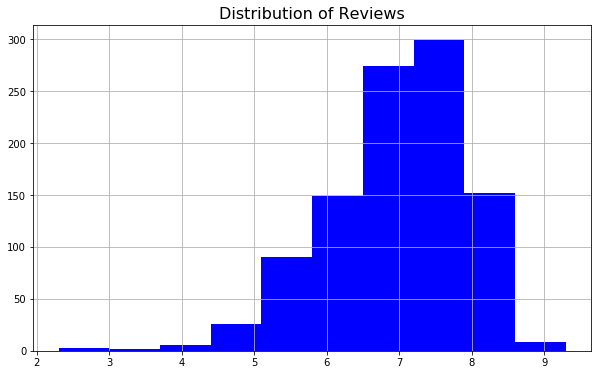

In [141]:
plt.figure(figsize=(10, 6))
movies['stars_out_of_10'].hist(color='blue'
                              )

plt.title('Distribution of Reviews', size=16)
#plt.xticks(range(0, 20, 1))
#plt.xlabel('Number of Reviews', size=14)
#plt.xlim(0, 20)
#plt.ylabel('Count', size=14)
#plt.tight_layout()
#plt.savefig('../visuals/useful_dist.png')

In [131]:
movies['stars_out_of_10'].describe()

count    1009.000000
mean        6.936075
std         0.948666
min         2.300000
25%         6.400000
50%         7.000000
75%         7.600000
max         9.300000
Name: stars_out_of_10, dtype: float64